<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Universal_LawAplliedToSaturn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- SOLAR SYSTEM SAFETY CHECK (Saturn) ---
Distance:      9.58 AU (4.64e-08 kpc)
Shear Rate:    2.08e+08 (km/s per kpc)
Critical Shear:100.00

Newtonian Velocity: 9.680000 km/s
VSC Prediction:     9.685417 km/s
Deviation:          0.005417281 km/s


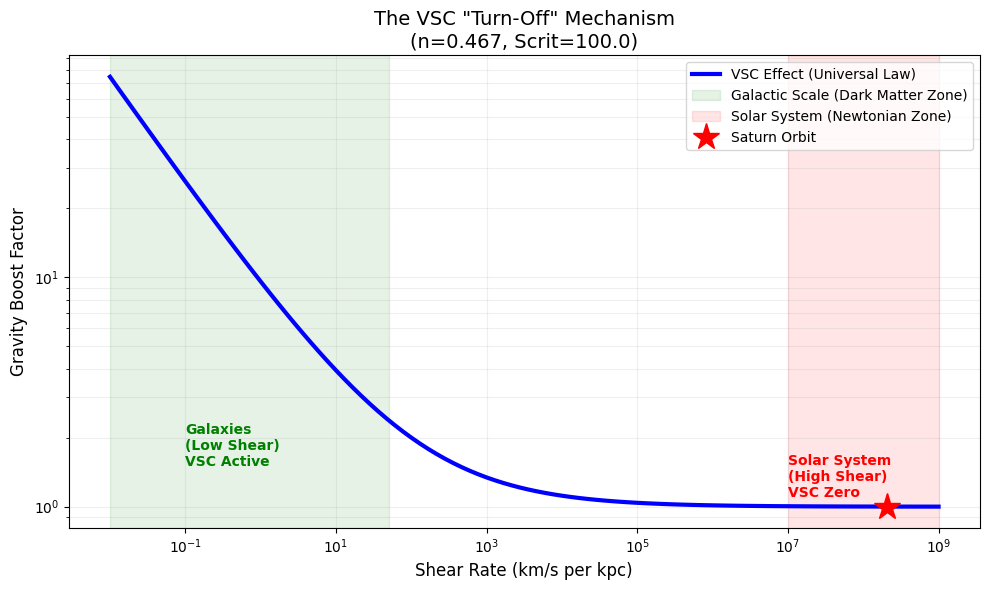

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. UNIVERSAL VSC PARAMETERS (From your "Strict" Fit) ---
N_UNIVERSAL = 0.467
S_CRIT_UNIVERSAL = 100.0  # Critical shear threshold

# --- 2. SOLAR SYSTEM DATA (Saturn) ---
# We use Saturn because it is far from the Sun (weaker gravity)
# If VSC is going to show up anywhere, it would be here.
# Source: NASA Planetary Fact Sheet
saturn_dist_au = 9.58        # Distance in AU
saturn_vel_kms = 9.68        # Orbital velocity in km/s

# Unit Conversion: AU to KPC
# 1 AU = 4.848e-9 kpc
au_to_kpc = 4.84814e-9
saturn_r_kpc = saturn_dist_au * au_to_kpc

# --- 3. CALCULATE SHEAR ---
# Shear = V / r (km/s per kpc)
# In the Solar System, r is TINY, so Shear is HUGE.
shear_saturn = saturn_vel_kms / saturn_r_kpc

# --- 4. APPLY UNIVERSAL LAW ---
# Boost = 1 + (Shear / Scrit)^(-n)
vsc_boost_factor = 1.0 + np.power(shear_saturn / S_CRIT_UNIVERSAL, -N_UNIVERSAL)

# Calculate the "VSC Velocity" vs "Newtonian Velocity"
v_vsc = saturn_vel_kms * np.sqrt(vsc_boost_factor)
deviation = v_vsc - saturn_vel_kms

# --- 5. REPORT CARD ---
print(f"--- SOLAR SYSTEM SAFETY CHECK (Saturn) ---")
print(f"Distance:      {saturn_dist_au:.2f} AU ({saturn_r_kpc:.2e} kpc)")
print(f"Shear Rate:    {shear_saturn:.2e} (km/s per kpc)")
print(f"Critical Shear:{S_CRIT_UNIVERSAL:.2f}")
print(f"")
print(f"Newtonian Velocity: {saturn_vel_kms:.6f} km/s")
print(f"VSC Prediction:     {v_vsc:.6f} km/s")
print(f"Deviation:          {deviation:.9f} km/s")

# --- 6. VISUALIZATION: The "Turn-Off" Curve ---
# Plot how VSC fades away as we move from the Galaxy to the Solar System
shear_range = np.logspace(-2, 9, 100) # From Outer Galaxy to Sun
boost_range = 1.0 + np.power(shear_range / S_CRIT_UNIVERSAL, -N_UNIVERSAL)

plt.figure(figsize=(10, 6))
plt.loglog(shear_range, boost_range, 'b-', linewidth=3, label='VSC Effect (Universal Law)')

# Mark the Galaxy Zone
plt.axvspan(0.01, 50, color='green', alpha=0.1, label='Galactic Scale (Dark Matter Zone)')
plt.text(0.1, 1.5, "Galaxies\n(Low Shear)\nVSC Active", color='green', fontweight='bold')

# Mark the Solar System Zone
plt.axvspan(1e7, 1e9, color='red', alpha=0.1, label='Solar System (Newtonian Zone)')
plt.text(1e7, 1.1, "Solar System\n(High Shear)\nVSC Zero", color='red', fontweight='bold')

# Plot Saturn
plt.plot(shear_saturn, vsc_boost_factor, 'r*', markersize=20, label='Saturn Orbit')

plt.xlabel('Shear Rate (km/s per kpc)', fontsize=12)
plt.ylabel('Gravity Boost Factor', fontsize=12)
plt.title(f'The VSC "Turn-Off" Mechanism\n(n={N_UNIVERSAL}, Scrit={S_CRIT_UNIVERSAL})', fontsize=14)
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.savefig('VSC_Solar_System_Check.png')
plt.show()